# Football matches

This dataset includes 42,483 results of international football matches starting from the very first official match in 1972 up to 2019. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.


### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


## Downloading the Dataset



> Instructions for downloading the dataset (delete this cell)
>
> - Find an interesting dataset on this page: https://www.kaggle.com/datasets?fileType=csv
> - The data should be in CSV format, and should contain at least 3 columns and 150 rows
> - Download the dataset using the [`opendatasets` Python library](https://github.com/JovianML/opendatasets#opendatasets)

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:

dataset_url = 'https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in "./international-football-results-from-1872-to-2017" (use force=True to force download)


The dataset has been downloaded and extracted.

In [5]:

data_dir = './international-football-results-from-1872-to-2017'

In [6]:
import os
os.listdir(data_dir)

['shootouts.csv', 'results.csv']

Let us save and upload our work to Jovian before continuing.

In [7]:
project_name = "zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020"

In [8]:
!pip install jovian --upgrade -q

In [9]:
import jovian

In [10]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020


'https://jovian.ai/singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020'

## Data Preparation and Cleaning





> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [11]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
matches_df = pd.read_csv('results.csv')

In [16]:
matches_df['date'] = pd.to_datetime(matches_df.date)

In [17]:
matches_df['date']

0       1872-11-30
1       1873-03-08
2       1874-03-07
3       1875-03-06
4       1876-03-04
           ...    
42478   2021-07-25
42479   2021-07-25
42480   2021-07-29
42481   2021-07-29
42482   2021-08-01
Name: date, Length: 42483, dtype: datetime64[ns]

In [18]:
del matches_df['neutral']
matches_df['total_goals'] = matches_df.loc[:,['home_score','away_score']].sum(axis=1)

In [19]:
matches_df

date      home_team away_team  home_score  away_score tournament  \
0     1872-11-30       Scotland   England           0           0   Friendly   
1     1873-03-08        England  Scotland           4           2   Friendly   
2     1874-03-07       Scotland   England           2           1   Friendly   
3     1875-03-06        England  Scotland           2           2   Friendly   
4     1876-03-04       Scotland   England           3           0   Friendly   
...          ...            ...       ...         ...         ...        ...   
42478 2021-07-25     Costa Rica    Canada           0           2   Gold Cup   
42479 2021-07-25  United States   Jamaica           1           0   Gold Cup   
42480 2021-07-29         Mexico    Canada           2           1   Gold Cup   
42481 2021-07-29  United States     Qatar           1           0   Gold Cup   
42482 2021-08-01  United States    Mexico           1           0   Gold Cup   

            city        country  total_goals  
0        Glasgow       Scotland            0  
1         London        England            6  
2        Glasgow       Scotland            3  
3         London        England            4  
4        Glasgow       Scotland            3  
...          ...            ...          ...  
42478  Arlington  United States            2  
42479  Arlington  United States            1  
42480    Houston  United States            3  
42481     Austin  United States            1  
42482  Las Vegas  United States            1  

[42483 rows x 9 columns]

In [20]:
import jovian

In [21]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020


'https://jovian.ai/singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020'

## Exploratory Analysis and Visualization





> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [22]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style("whitegrid")
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (20, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [23]:
matches_df

date      home_team away_team  home_score  away_score tournament  \
0     1872-11-30       Scotland   England           0           0   Friendly   
1     1873-03-08        England  Scotland           4           2   Friendly   
2     1874-03-07       Scotland   England           2           1   Friendly   
3     1875-03-06        England  Scotland           2           2   Friendly   
4     1876-03-04       Scotland   England           3           0   Friendly   
...          ...            ...       ...         ...         ...        ...   
42478 2021-07-25     Costa Rica    Canada           0           2   Gold Cup   
42479 2021-07-25  United States   Jamaica           1           0   Gold Cup   
42480 2021-07-29         Mexico    Canada           2           1   Gold Cup   
42481 2021-07-29  United States     Qatar           1           0   Gold Cup   
42482 2021-08-01  United States    Mexico           1           0   Gold Cup   

            city        country  total_goals  
0        Glasgow       Scotland            0  
1         London        England            6  
2        Glasgow       Scotland            3  
3         London        England            4  
4        Glasgow       Scotland            3  
...          ...            ...          ...  
42478  Arlington  United States            2  
42479  Arlington  United States            1  
42480    Houston  United States            3  
42481     Austin  United States            1  
42482  Las Vegas  United States            1  

[42483 rows x 9 columns]

In [24]:
cumulative_home_score = matches_df['home_score'].cumsum()
matches_df.insert(4,'cum_home_goals',cumulative_home_score)

In this part, I used cumsum() function to find total goals of home teams and away teams. I used cumsum() because I can find total goals for a particular time period. I also visualize it with a basic line graph to see better.

In [25]:
cumulative_away_score = matches_df['away_score'].cumsum()
matches_df.insert(6,'cum_away_goals',cumulative_away_score)

In [26]:
matches_df

date      home_team away_team  home_score  cum_home_goals  \
0     1872-11-30       Scotland   England           0               0   
1     1873-03-08        England  Scotland           4               4   
2     1874-03-07       Scotland   England           2               6   
3     1875-03-06        England  Scotland           2               8   
4     1876-03-04       Scotland   England           3              11   
...          ...            ...       ...         ...             ...   
42478 2021-07-25     Costa Rica    Canada           0           74078   
42479 2021-07-25  United States   Jamaica           1           74079   
42480 2021-07-29         Mexico    Canada           2           74081   
42481 2021-07-29  United States     Qatar           1           74082   
42482 2021-08-01  United States    Mexico           1           74083   

       away_score  cum_away_goals tournament       city        country  \
0               0               0   Friendly    Glasgow       Scotland   
1               2               2   Friendly     London        England   
2               1               3   Friendly    Glasgow       Scotland   
3               2               5   Friendly     London        England   
4               0               5   Friendly    Glasgow       Scotland   
...           ...             ...        ...        ...            ...   
42478           2           50365   Gold Cup  Arlington  United States   
42479           0           50365   Gold Cup  Arlington  United States   
42480           1           50366   Gold Cup    Houston  United States   
42481           0           50366   Gold Cup     Austin  United States   
42482           0           50366   Gold Cup  Las Vegas  United States   

       total_goals  
0                0  
1                6  
2                3  
3                4  
4                3  
...            ...  
42478            2  
42479            1  
42480            3  
42481            1  
42482            1  

[42483 rows x 11 columns]

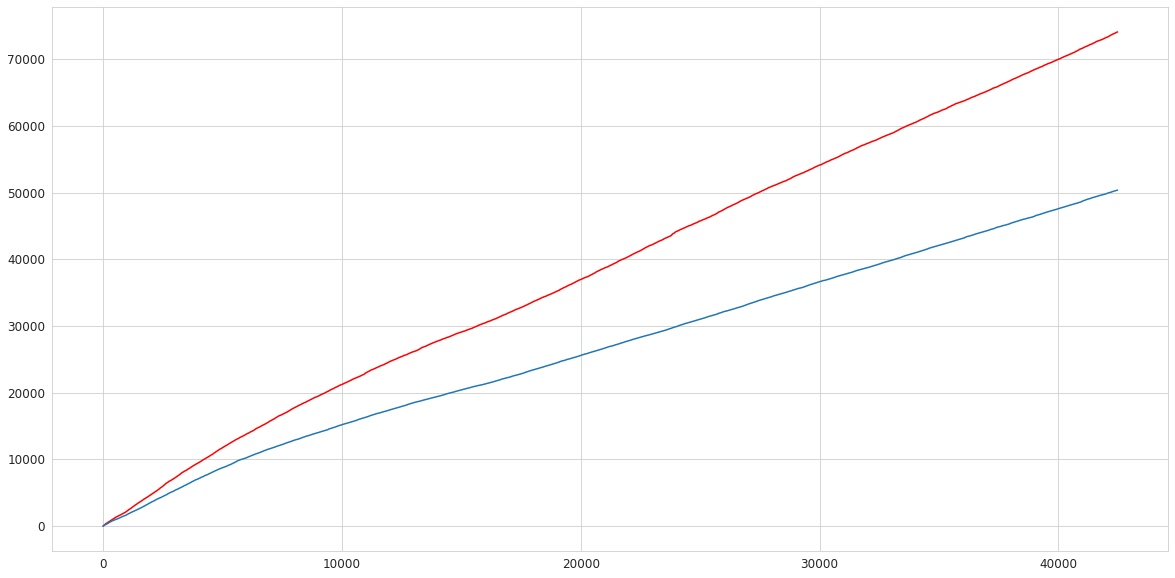

In [27]:
plt.plot(matches_df.cum_home_goals,'r')
plt.plot(matches_df.cum_away_goals);

Let us save and upload our work to Jovian before continuing

In [28]:
import jovian

In [29]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020


'https://jovian.ai/singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020'

## Asking and Answering Questions





> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1:At which matches teams scored most goals?

I sorted my data by total goals and after that I took the most goals scored 20 matches. To see better, I use seaborn's scatterplot function to visualize my result.

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


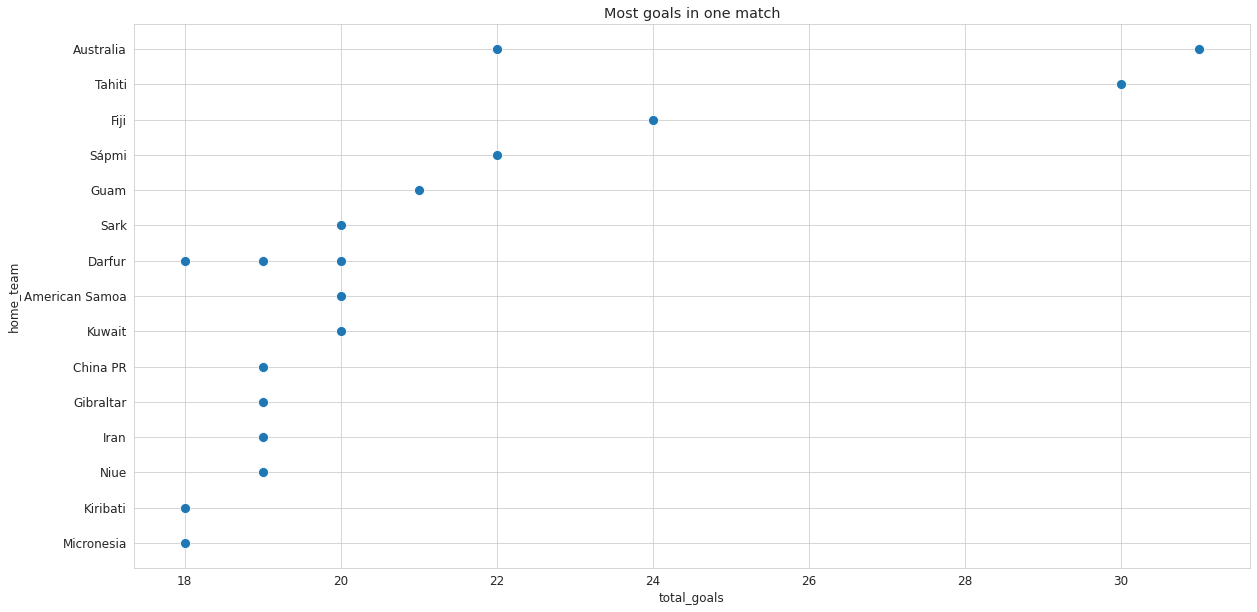

In [30]:
most_goals_20_matches = matches_df.sort_values(by='total_goals',ascending=False).head(20);
sns.scatterplot(most_goals_20_matches.total_goals,
                most_goals_20_matches.home_team,
                s=100)
plt.title('Most goals in one match');

#### Q2: Which teams played most matches at home up today?

This is important to understand the countries' football history better. After finding these countries, I visualize it and I see South American countries' football histories are so old.

In [31]:
most_played_home_teams = matches_df.home_team.value_counts(sort=True).head(10)
most_played_home_teams

Brazil         581
Argentina      557
Mexico         524
Germany        518
England        513
Sweden         497
France         493
South Korea    471
Hungary        464
Italy          456
Name: home_team, dtype: int64

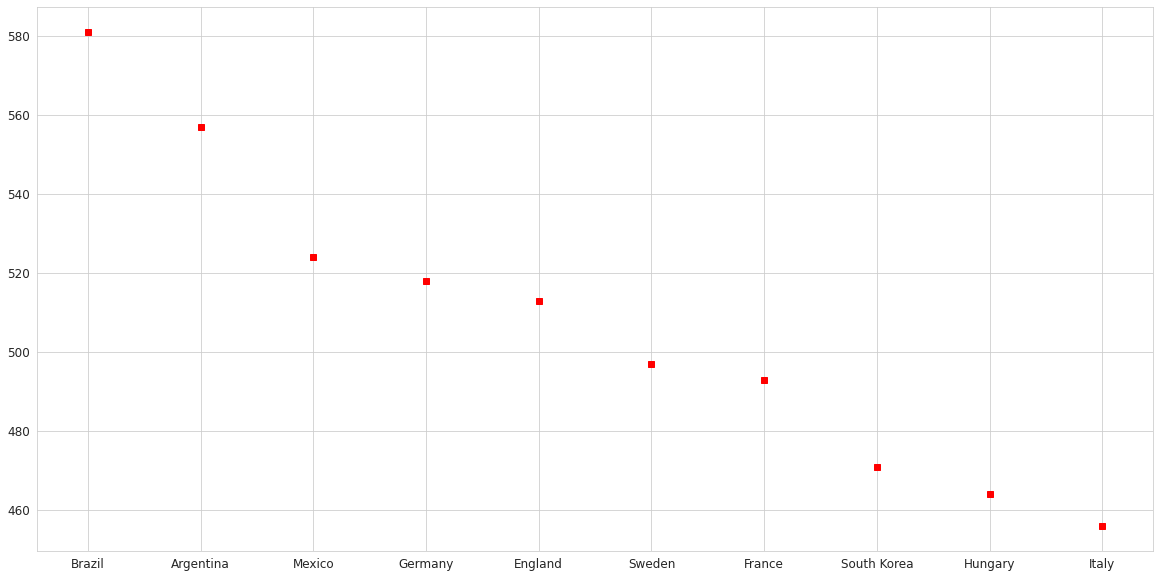

In [32]:
plt.plot(most_played_home_teams,'rs');

#### Q3: Are most played home teams and most played away teams same?

Actually this part suprised me so much because head 10 of both home teams and away teams are quite different. In my opinion, away teams tried to improve their footballs by going other countries to play. I also merge two data in one graph to visualize it.

In [33]:
most_played_away_teams = matches_df.away_team.value_counts(sort=True).head(10)
most_played_away_teams

Uruguay      547
Sweden       539
England      516
Hungary      484
Paraguay     461
Germany      449
Poland       439
Argentina    439
Zambia       428
Finland      425
Name: away_team, dtype: int64

In [34]:
plt.plot(most_played_away_teams,'bo')
plt.plot(most_played_home_teams,'rs');

#### Q4: Which tournaments is most popular?

My data have a column to identify the type of match. I wonder which type of matches are most common in 41,640 matches. Friendly matches are ahead of other types. I also make a plot of it to understand better.

In [35]:
most_played_tournaments = matches_df.tournament.value_counts(sort=True).head(10)
most_played_tournaments

Friendly                                17279
FIFA World Cup qualification             7477
UEFA Euro qualification                  2582
African Cup of Nations qualification     1719
FIFA World Cup                            900
Copa América                              841
AFC Asian Cup qualification               724
African Cup of Nations                    690
CECAFA Cup                                620
CFU Caribbean Cup qualification           606
Name: tournament, dtype: int64

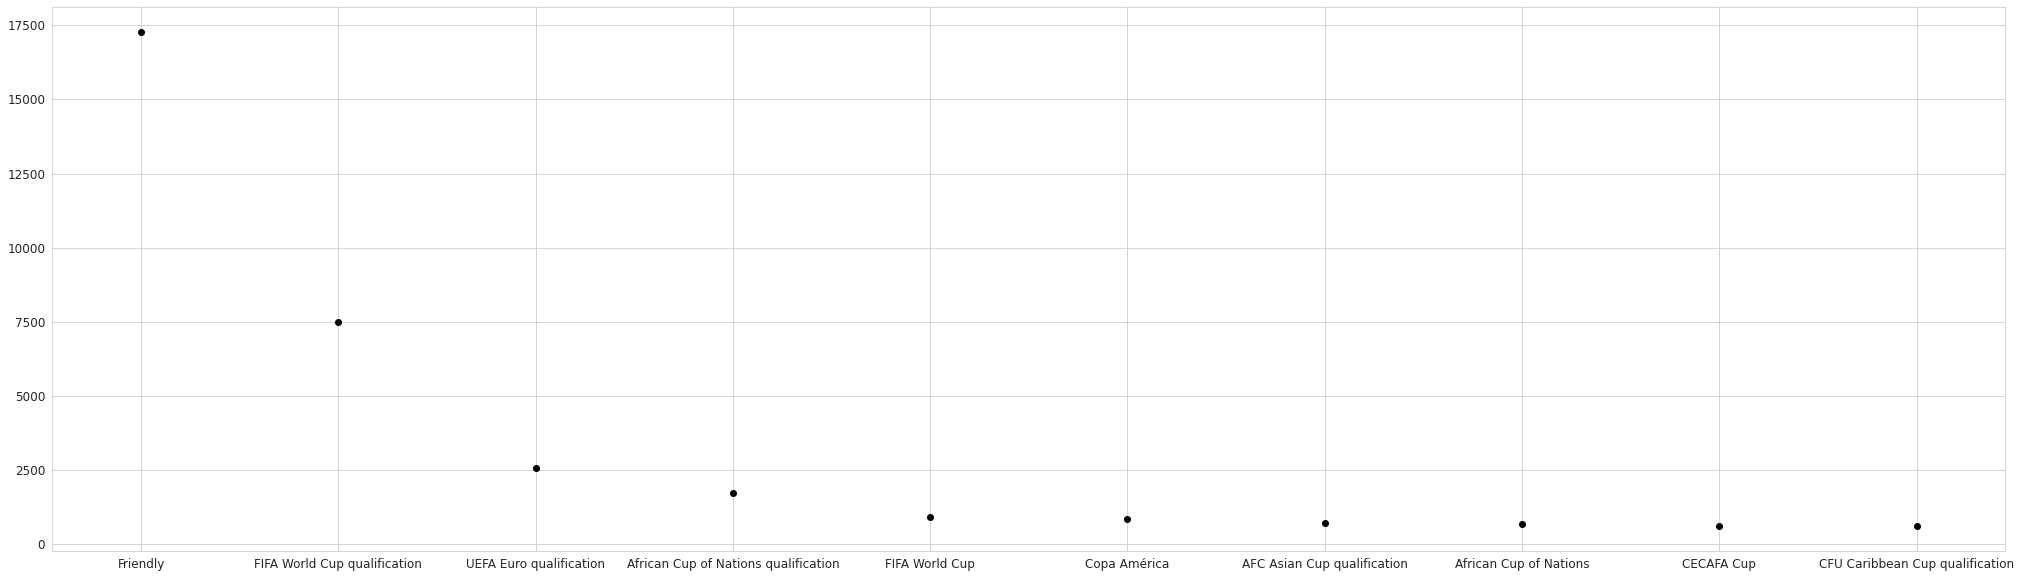

In [36]:
matplotlib.rcParams['figure.figsize'] = (35, 10)
plt.plot(most_played_tournaments,'ko');

#### Q5:How can we say about Turkey's football performance?

Turkey scored 409 goals(Turkey_home_positive) and conceded 316 goals(Turkey_home_negative) at home, scored 345 goals(Turkey_away_positive) and 473 goals(Turkey_away_negative) conceded at away. Ergo, Turkey has a good performance at home but Turkey football team's away performance is so bad. After finding these values, I want to learn what type of matches Turkey played at home. Namely, I look at the tournaments Turkey played at home and I visualize it with bar plot.

In [37]:
Turkey_home_matches = matches_df.loc[matches_df['home_team'] == 'Turkey']
Turkey_away_matches = matches_df.loc[matches_df['away_team'] == 'Turkey']

In [38]:
Turkey_home_positive = sum(Turkey_home_matches['home_score'])
Turkey_home_negative = sum(Turkey_home_matches['away_score'])
Turkey_home_positive, Turkey_home_negative

(428, 331)

In [39]:
Turkey_away_negative = sum(Turkey_away_matches['home_score'])
Turkey_away_positive = sum(Turkey_away_matches['away_score'])
Turkey_away_negative, Turkey_away_positive

(485, 353)

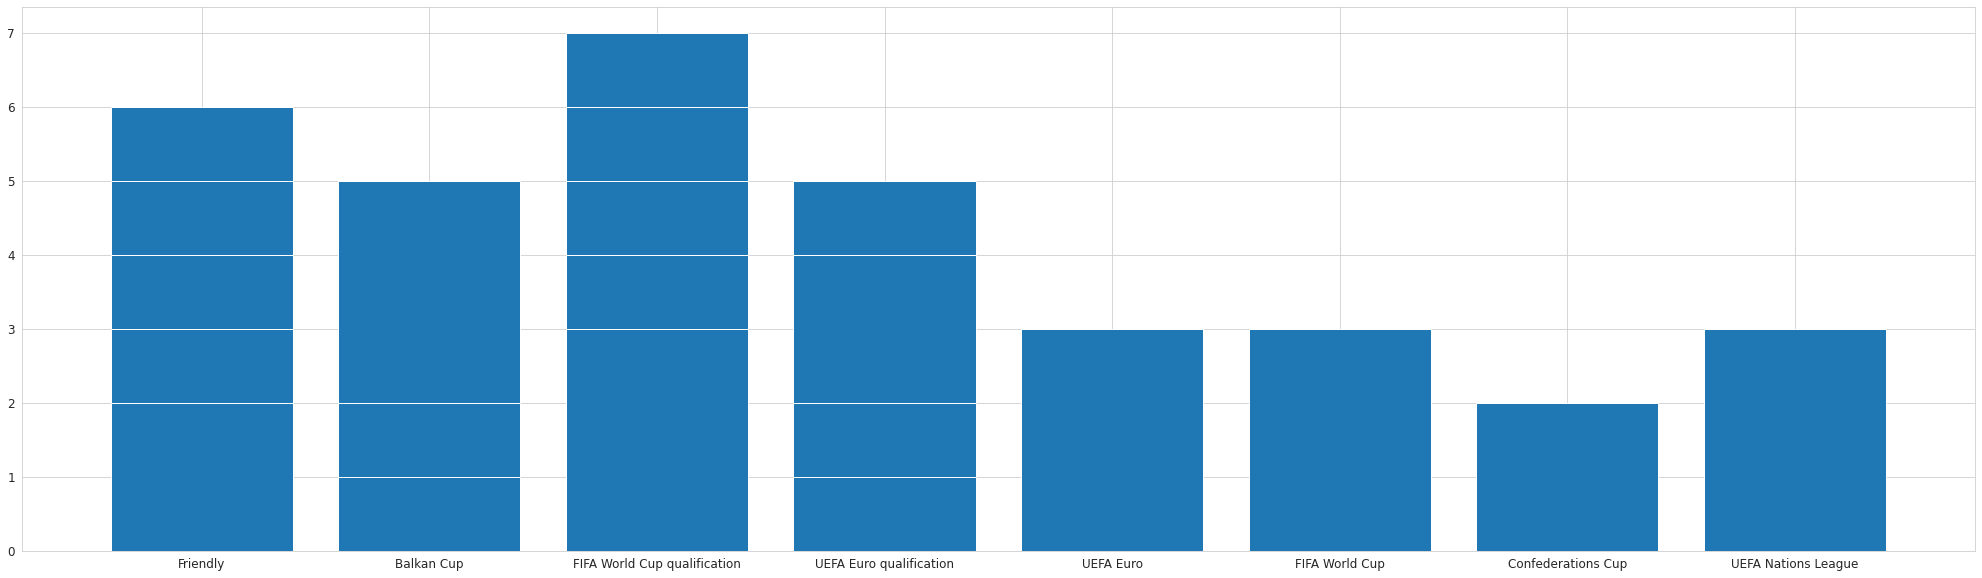

In [40]:
plt.bar(Turkey_home_matches['tournament'],Turkey_home_matches['home_score']);

Let us save and upload our work to Jovian before continuing.

In [41]:
import jovian

In [42]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020


'https://jovian.ai/singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020'

## Inferences and Conclusion
In the course project, I learned so much when I was doing it. I searched lots of things from different sources and learned new concepts about pandas and data visualization. I want to also talk a little bit this 'Zero to Pandas' course. This course is so beneficial and I will use informations that I learned here, in my career. Data Science is very important for my major and thanks to this course, I learned so much.

In [43]:
import jovian

In [44]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020


'https://jovian.ai/singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [45]:
import jovian

In [ ]:
jovian.commit()

<IPython.core.display.Javascript object>

In [47]:
jovian.submit(assignment="zero-to-pandas-project")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project


In [1]:
jovian.submit(assignment="zero-to-pandas-project")


<IPython.core.display.Javascript object>

[jovian] Updating notebook "singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/singh-mridulika/zerotopandas-analysis-of-international-footbal-matches-between-1872-to-2020
[jovian] Submitting assignment..
[jovian] Verify your submission at https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
